## Data exploration

In [1]:
import pandas as pd

In [2]:
comments = pd.read_csv('Datathon 2024 - Reto Hey - Dataset Puìblico - Sheet1.csv')

In [4]:
df = comments

In [6]:
df

,date,time,tweet
0,2023-01-01,NaN,"Resuelto, muchísimas gracias , excelente servi..."
1,2023-01-02,NaN,"Muchas gracias, espero su dm"
2,2023-01-02,NaN,Muchas gracias!
3,2023-01-02,NaN,Algo similar me paso. Quería renovar mi token ...
4,2023-01-02,NaN,Yeeeei! a través de mi cuenta en acabo de cont...
...,...,...,...
807,2024-04-21,15:21:43,"Ahora confirmo, gracias estimado"
808,2024-04-23,22:52:05,😔 de acuerdo!! Muchas gracias.
809,2024-04-23,21:30:12,"Tío cuando me van a graduar, tengo la TDC gara..."
810,2024-04-25,00:51:24,"una duda, con quién tengo que ver si tengo pro..."


In [7]:
# Ordenar datos por fecha y tiempo
df.sort_values('date', inplace=True)

# Eliminar cualquier fila con comentarios faltantes
df.dropna(subset=['tweet'], inplace=True)

In [9]:
import pandas as pd
from textblob import TextBlob

In [10]:
# Función para obtener la polaridad del texto
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Aplicar la función de análisis de sentimiento
df['sentiment'] = df['tweet'].apply(get_sentiment)

# Clasificar como positivo, negativo o neutral basado en la polaridad
df['sentiment_type'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

In [15]:
print(df)

                time                                              tweet  \
date                                                                      
2023-01-01       NaN  Resuelto, muchísimas gracias , excelente servi...   
2023-01-02       NaN                       Muchas gracias, espero su dm   
2023-01-02       NaN                                    Muchas gracias!   
2023-01-02       NaN  Algo similar me paso. Quería renovar mi token ...   
2023-01-02       NaN  Yeeeei! a través de mi cuenta en acabo de cont...   
...              ...                                                ...   
2024-04-21  15:21:43                   Ahora confirmo, gracias estimado   
2024-04-23  22:52:05                     😔 de acuerdo!! Muchas gracias.   
2024-04-23  21:30:12  Tío cuando me van a graduar, tengo la TDC gara...   
2024-04-25  00:51:24  una duda, con quién tengo que ver si tengo pro...   
2024-04-26  13:30:56  Wey, lo mejor de es que puedo pagar con Apple ...   

            sentiment se

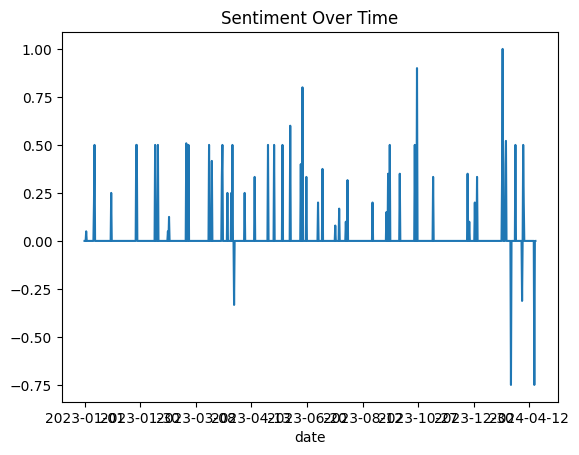

In [13]:
import matplotlib.pyplot as plt

# Crear un gráfico de la evolución del sentimiento a lo largo del tiempo
df.set_index('date', inplace=True)
df['sentiment'].plot(title='Sentiment Over Time')
plt.show()

## Web scrapping - El economista

In [7]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.common.exceptions import ElementClickInterceptedException, NoSuchElementException
from webdriver_manager.chrome import ChromeDriverManager
from time import sleep

# Iniciar el navegador
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Abrir la página
driver.get("https://www.eleconomista.com.mx/buscar/bbva") # Here we change the keyword (bbva, nu, santander, hey banco)

# Esperar a que la página cargue
sleep(3)

# Intentar hacer clic en el botón "Ver más" múltiples veces
while True:
    try:
        button = driver.find_element(By.CSS_SELECTOR, 'button.jsx-3139938482.jsx-4006103487.jsx-1895778996.button.jsx-2552186658.primary.block')
        if button.text == "Ver más":
            button.click()
            sleep(2)  # Esperar a que cargue el contenido adicional
    except (NoSuchElementException, ElementClickInterceptedException) as e:
        print("No más 'Ver más' botones disponibles o no se pudo clickear:", e)
        break  # Sale del bucle si el botón no se encuentra o no se puede hacer clic

# Extraer todos los href después de cargar más contenido y filtrar por .html
unique_links = set()  # Utilizar un conjunto para almacenar enlaces únicos
links = driver.find_elements(By.TAG_NAME, 'a')
for link in links:
    href = link.get_attribute('href')
    if href and href.endswith('.html'):
        unique_links.add(href)

# Imprimir los enlaces únicos
for link in unique_links:
    print(link)

# Cerrar el navegador
driver.quit()


No más 'Ver más' botones disponibles o no se pudo clickear: Message: no such element: Unable to locate element: {"method":"css selector","selector":"button.jsx-3139938482.jsx-4006103487.jsx-1895778996.button.jsx-2552186658.primary.block"}
  (Session info: chrome=124.0.6367.119); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x011DC113+48259]
	(No symbol) [0x0116CA41]
	(No symbol) [0x01060A17]
	(No symbol) [0x010A0BED]
	(No symbol) [0x010A0C9B]
	(No symbol) [0x010DBC12]
	(No symbol) [0x010C0DE4]
	(No symbol) [0x010D9B9C]
	(No symbol) [0x010C0B36]
	(No symbol) [0x0109570D]
	(No symbol) [0x010962CD]
	GetHandleVerifier [0x01496533+2908323]
	GetHandleVerifier [0x014D3B4B+3159739]
	GetHandleVerifier [0x0127505B+674763]
	GetHandleVerifier [0x0127B21C+699788]
	(No symbol) [0x01176244]
	(No symbol) [0x01172298]
	(No symbol) [0x0117242C]
	(No symbol) [0x01164BB0]
	Ba

Este codigo abre todo los urls y guarda la información en json

In [9]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.common.exceptions import WebDriverException
from webdriver_manager.chrome import ChromeDriverManager
from time import sleep
import json
import re

# Iniciar el navegador
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Lista de artículos
articles = []

# Lista de URLs
urls = unique_links

for url in urls:
    try:
        driver.get(url)
        sleep(3)  # Esperar a que la página cargue completamente

        # Verificar errores comunes en la carga de página
        body_text = driver.find_element(By.TAG_NAME, 'body').text
        if "Application error" in body_text:
            print(f"Error en la aplicación al cargar {url}, pasando al siguiente.")
            continue

        # Extraer la fecha del URL
        match = re.search(r'(\d{4})(\d{2})(\d{2})', url)
        if match:
            year, month, day = match.groups()
            date = f"{year}-{month}-{day}T00:00:00Z"
        
        # Extraer el título y el contenido
        title = driver.find_element(By.CSS_SELECTOR, 'h1.jsx-891979598').text
        paragraphs = driver.find_elements(By.CSS_SELECTOR, 'p.jsx-3954459878')
        content = " ".join([paragraph.text for paragraph in paragraphs])

        # Añadir al listado de artículos
        articles.append({
            "date": date,
            "contenido": content,
            "title": title,
            "source": "eleconomista",
            "bank": "bbva" # Here we change the keyword (bbva, nu, santander, hey banco)
        })

    except WebDriverException as e:
        print(f"Se encontró un error al procesar {url}: {e}. Continuando con el siguiente enlace.")

# Cerrar el navegador
driver.quit()

# Guardar los datos en un archivo JSON
with open('articles_bbva.json', 'w', encoding='utf-8') as f:
    json.dump(articles, f, ensure_ascii=False, indent=4)


Se encontró un error al procesar https://www.eleconomista.com.mx/sectorfinanciero/BBVA-espera-que-el-credito-hipotecario-de-la-banca-crezca-2.4-este-ano-20240404-0082.html: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h1.jsx-891979598"}
  (Session info: chrome=124.0.6367.119); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0078C113+48259]
	(No symbol) [0x0071CA41]
	(No symbol) [0x00610A17]
	(No symbol) [0x00650BED]
	(No symbol) [0x00650C9B]
	(No symbol) [0x0068BC12]
	(No symbol) [0x00670DE4]
	(No symbol) [0x00689B9C]
	(No symbol) [0x00670B36]
	(No symbol) [0x0064570D]
	(No symbol) [0x006462CD]
	GetHandleVerifier [0x00A46533+2908323]
	GetHandleVerifier [0x00A83B4B+3159739]
	GetHandleVerifier [0x0082505B+674763]
	GetHandleVerifier [0x0082B21C+699788]
	(No symbol) [0x00726244]
	(No symbol) [0x00722298]
	(No symbol) 